# Data Exploring Opioid Prescribing Rates at Federal Level - Analysis 

## (Source: https://catalog.data.gov/dataset/opioid-prescribing-rates-at-va-facilities-2012-2018)


* This notebook analyzes which states have the highest and lowest opioid prescribing rate at Department of Veterans Affairs medical centers in 2016 and 2018 and if longitude is a factor that affects prescribing rates. This is more of a general high-level analysis for our data story.
* The dataset that I am using is opi_prescribing_rates_df_clean.csv from data.gov (source: https://catalog.data.gov/dataset/opioid-prescribing-rates-at-va-facilities-2012-2018) which is federal level data containing all the states, including CT.

## Setup

In [37]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import math
import seaborn as sns

## Questions 1 & 2
Which states have the highest opioid prescribing rates at the federal level in 2012? What about in 2018?

### Steps
* Load the data from dataframe "opi_prescribing_rates_df_clean"
* Group 2012 prescribing rates by state name and find the mean prescribing rate of each state
* Sort values in descending order 
* Repeat steps 2-3 again for 2018 prescribing rate

### Code

In [10]:
opi_prescribing_rates_df = pd.read_csv('../data/opi_prescribing_rates_df_clean.csv')

In [11]:
# Finding highest mean 2012 prescribing rate of states in dataset
state_frequency2012 = opi_prescribing_rates_df.groupby("state_full")["2012 Prescribing Rate"].mean()
state_frequency2012.sort_values(ascending=False)

state_full
Oklahoma                0.242844
Nevada                  0.237569
Oregon                  0.237513
Arkansas                0.235962
New Mexico              0.234439
Indiana                 0.230697
Idaho                   0.229355
Washington              0.221337
Utah                    0.220782
Michigan                0.220718
North Carolina          0.217712
Tennessee               0.215686
Georgia                 0.213290
Kentucky                0.208050
Arizona                 0.206743
California              0.206487
Montana                 0.196415
Mississippi             0.192088
Louisiana               0.188088
Alabama                 0.185838
Colorado                0.183462
Texas                   0.182905
West Virginia           0.181397
Alaska                  0.173934
Virginia                0.173130
Kansas                  0.169597
Ohio                    0.164783
Wyoming                 0.163401
Missouri                0.162823
South Dakota            0.143627

In [12]:
# Finding highest mean 2018 prescribing rate of states in dataset
state_frequency2018 = opi_prescribing_rates_df.groupby("state_full")["2018 Prescribing Rate"].mean()
state_frequency2018.sort_values(ascending=False)

state_full
Idaho                   0.149819
Oklahoma                0.133001
New Mexico              0.130729
Oregon                  0.130276
Montana                 0.126878
Washington              0.126623
Nevada                  0.122156
Colorado                0.117924
Utah                    0.117809
Kentucky                0.116729
Louisiana               0.115139
Alabama                 0.114137
Indiana                 0.113660
California              0.113604
Arizona                 0.112044
Georgia                 0.109521
Arkansas                0.108011
Michigan                0.106152
Tennessee               0.105523
North Carolina          0.103455
West Virginia           0.100163
Mississippi             0.092797
Wyoming                 0.092154
Kansas                  0.091194
Virginia                0.089239
Missouri                0.089065
South Dakota            0.084316
Illinois                0.083359
Texas                   0.082971
Wisconsin               0.082320

### Answer
First, to clarify, the prescribing rate is the % of total prescriptions adminstered by statewide VA medical centers as per https://www.usatoday.com/story/news/politics/2018/01/11/va-publicly-releases-opiate-prescribing-rates-all-its-hospitals-first-time/1024895001/.

#### 2012 PRESCRIBING RATE
The top 5 states with the highest prescribing rates in 2012 are Oklahoma, Nevada, Oregon, Arkansas, and New Mexico in descending order. They were all above 23% of total prescriptions.

Connecticut was ranked 4th lowest with a 8.94% prescribing rate.

#### 2018 PRESCRIBING RATE
The top 5 states with the highest prescribing rates in 2018 are Idaho, Oklahoma, New Mexico, Oregon, and Montana in descending order. They were all above 12% of total prescriptions but far less than in 2012. 

Connecticut was ranked 8th lowest with a 6.47% prescribing rate.

### Oberservation/Interpretation
It seems like states in the Midwest/West have the highest opioid prescribing rates. Oklahoma, Oregon, and New Mexico are in the top 5 states for both 2012 and 2018. 

What is intriguing is that Connecticut's prescribing rate is consistently low. It is less than half of the highest prescribing rate for both years.

Furthermore, there is an apparent trend that prescribing rates have drastically lowered from 2012 to 2018. Oklahoma was the highest in 2012 at a 24.3% prescribing rate whereas in 2018, Idaho was the highest with just 15.0%.

## Question 3 & 4
Which states have the lowest opioid prescribing rates in 2012? What about in 2018?

### Steps
* Group 2012 prescribing rates by state name and find the mean prescribing rate of each state
* Sort values ascending order
* Repeat steps 1-2 again for 2018 prescribing rate

### Code

In [13]:
# Finding lowest mean 2012 prescribing rate of states in dataset
state_lowest2012 = opi_prescribing_rates_df.groupby("state_full")["2012 Prescribing Rate"].mean()
state_lowest2012.sort_values(ascending=True).head(5)

state_full
Puerto Rico      0.046192
New Jersey       0.057921
Phillipines      0.059977
Connecticut      0.089403
Massachusetts    0.092923
Name: 2012 Prescribing Rate, dtype: float64

In [14]:
# Finding lowest mean 2018 prescribing rate of states in dataset
state_frequency2018 = opi_prescribing_rates_df.groupby("state_full")["2018 Prescribing Rate"].mean()
state_frequency2018.sort_values(ascending=True).head(5)

state_full
Puerto Rico             0.027781
New Jersey              0.041890
North Dakota            0.050339
District of Columbia    0.056043
Massachusetts           0.056163
Name: 2018 Prescribing Rate, dtype: float64

### Answer

In 2012, the top 5 states/US territories with the lowest prescribing rates are Puerto Rico, New Jersey, Phillipines, Connecticut, and Massachusetts.

In 2018, the top 5 states/US territories with the lowest prescribing rates are Puerto Rico, New Jersey, North Dakota, District of Columbia, and Massachusetts.

### Observation/Interpretation
It is interesting that 3/5 states of the top 5 that have the lowest prescribing rates in both 2012 and 2018 are on the East Coast. 

This is in contrast with the states who have the highest prescribing rates - most of them are more West. 

With that said, I am curious about my first observation with Questions 1 & 2. Does longitude have any relationship with prescribing rates? My hypothesis is that as we go further West, the prescribing rate increases.

## Question 5 & 6
Does longitude have an effect on opioid prescribing rates in 2012? What about in 2018?

### Steps
* Create a regression plot with x as longitude and y as 2012 prescribing rate
* Apply correlation to both x and y variables declared above to see strength of relationship
* Create a scatterplot with hue to identify various states
* Repeat steps 1-3 with y as 2018 prescribing rate

### Code

In [111]:
#2012 prescribing rate
prate_2012_lng = opi_prescribing_rates_df[["state_full", "2012 Prescribing Rate", "longitude"]]
prate_2012_lng = prate_2012_lng.set_index("state_full")
prate_2012_lng.head(5)

,2012 Prescribing Rate,longitude
state_full,,
Wyoming,0.139492,-106.984884
Wyoming,0.187310,-104.789595
Wisconsin,0.137437,-87.976158
Wisconsin,0.122421,-90.493910
Wisconsin,0.132611,-89.431033


In [112]:
?prate_2012_lng.drop

In [115]:
# can create a list of state names to drop

states_to_drop = ['Alaska', 'Hawaii', 'Phillipines', 'Puerto Rico']

prate_2012_lng=prate_2012_lng.drop(index=states_to_drop)

# more concise than:
#prate_2012_lng=prate_2012_lng.drop('Alaska')
#prate_2012_lng=prate_2012_lng.drop('Hawaii')
#prate_2012_lng=prate_2012_lng.drop('Phillipines')


,longitude,2012 Prescribing Rate
longitude,1.000000,-0.507777
2012 Prescribing Rate,-0.507777,1.000000


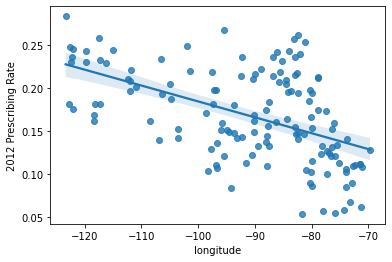

In [116]:
sns.regplot(x="longitude", y="2012 Prescribing Rate", data = prate_2012_lng)
prate_2012_lng[['longitude', '2012 Prescribing Rate']].corr()

,longitude,2012 Prescribing Rate
longitude,1.000000,-0.507777
2012 Prescribing Rate,-0.507777,1.000000


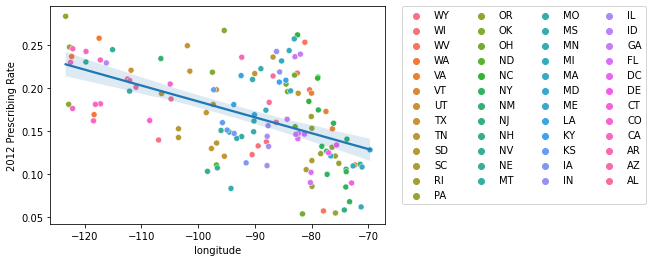

In [117]:
# filtering out Phillipines, Alaska, Hawaii as longitude outliers
# ADD Puerto Rico
state_list = ["Phillipines", "Alaska", "Hawaii", "Puerto Rico"]
noncontinental_filter = opi_prescribing_rates_df["state_full"].isin(state_list)
opi_prescribing_rates_US = opi_prescribing_rates_df[-noncontinental_filter]

# creating scatterplot of 2012 prescribing rate
splot = sns.scatterplot(x="longitude", y="2012 Prescribing Rate", 
            hue='state_postal',
            data = opi_prescribing_rates_US,
            )

sns.regplot(x="longitude", y="2012 Prescribing Rate", 
            data = opi_prescribing_rates_US, scatter=False)

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, ncol=4)

# finding correlation
opi_prescribing_rates_US[['longitude', '2012 Prescribing Rate']].corr()

In [119]:
#2018 prescribing rate
prate_2018_lng = opi_prescribing_rates_df[["state_full", "2018 Prescribing Rate", "longitude"]]
prate_2018_lng = prate_2018_lng.set_index("state_full")
prate_2018_lng.head(5)

,2018 Prescribing Rate,longitude
state_full,,
Wyoming,0.083503,-106.984884
Wyoming,0.100805,-104.789595
Wisconsin,0.088252,-87.976158
Wisconsin,0.068431,-90.493910
Wisconsin,0.090277,-89.431033


In [120]:
prate_2018_lng=prate_2018_lng.drop(states_to_drop)
#prate_2018_lng=prate_2018_lng.drop('Alaska')
#prate_2018_lng=prate_2018_lng.drop('Hawaii')
#prate_2018_lng=prate_2018_lng.drop('Phillipines')

,longitude,2018 Prescribing Rate
longitude,1.000000,-0.495665
2018 Prescribing Rate,-0.495665,1.000000


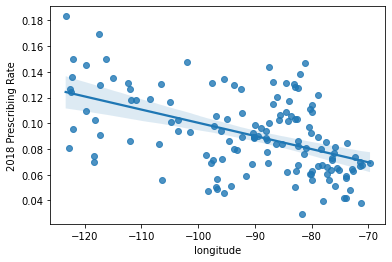

In [121]:
sns.regplot(x="longitude", y="2018 Prescribing Rate", data = prate_2018_lng)
prate_2018_lng[['longitude', '2018 Prescribing Rate']].corr()

,longitude,2018 Prescribing Rate
longitude,1.000000,-0.495665
2018 Prescribing Rate,-0.495665,1.000000


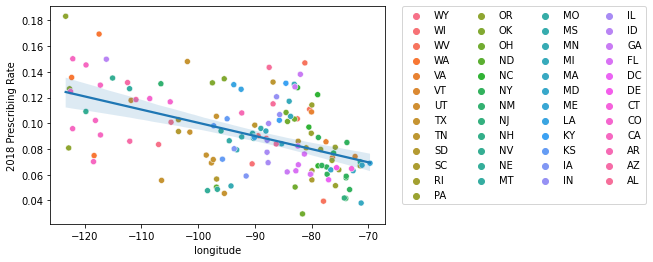

In [122]:
# creating scatterplot of 2018 prescribing rate
splot = sns.scatterplot(x="longitude", y="2018 Prescribing Rate", 
            hue='state_postal',
            data = opi_prescribing_rates_US,
            )

sns.regplot(x="longitude", y="2018 Prescribing Rate", 
            data = opi_prescribing_rates_US, scatter=False)

plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', borderaxespad=0, ncol=4)

# finding correlation
opi_prescribing_rates_US[['longitude', '2018 Prescribing Rate']].corr()

### Answer
There seems to be a moderate negative relationship between longitude and 2012 opioid prescribing rates because the correlation is -0.520383. There is also a moderate negative relationship between longitude and 2018 opioid prescribing rates with a correlation of -0.507859.

The correlation for the latter is slightly lower in absolute value than the former which means the relationship is slightly weaker.

### Observation/Interpretation
These results mean that as one moves further East, the prescribing rate decreases. In other words, as one moves further West, the prescribing rate increases. This latter statement matches my hypothesis from the first question. 

I am curious about any underlying reasons for this moderately strong trend. Some reasons I have thought of are more relaxed opioid prescription laws and the increased proportion of rural areas relative to urban areas in the West. 

<div class="alert alert-info">

### Plotting data onto US state map
    
* There are a few ways we could look at these data plotting long/lat points to show topological layout
    

</div>

#### 1. Using longitude and latitude for x and y on a scatter plot

* You can just plot each row (medical center) using the `longitude` and `latitude` columns for X and Y position and color the point using the `2018 Prescribing Rate' column

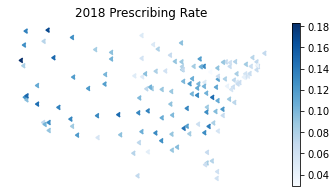

In [137]:
opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2018 Prescribing Rate'],
                              cmap='Blues',
                              figsize=(6,3),
                              marker=4
                             )
plt.axis('off')
plt.title('2018 Prescribing Rate')
plt.show()



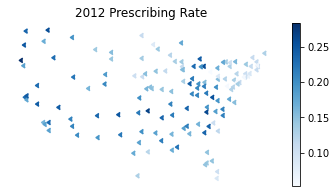

In [139]:
opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2012 Prescribing Rate'],
                              cmap='Blues',
                              figsize=(6,3),
                              marker=4
                             )
plt.axis('off')
plt.title('2012 Prescribing Rate')
plt.show()

* NOTE could further develop this to show them side by side or use the difference column

#### 2. Use `geopandas` and a US State Map

1. First we can load in a state map and then overplot the plots as above

In [144]:
# load GeoJSON file with outlines of states
us_map_gdf = gpd.read_file('../data/us_states.geojson')

<AxesSubplot:>

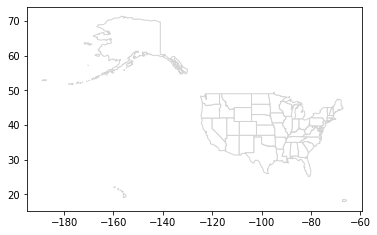

In [143]:
us_map_gdf.plot(color='white', edgecolor='lightgray')

<AxesSubplot:>

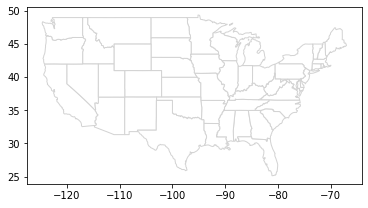

In [148]:
# drop the outlier states from above

# make row filter
drop_states_filter = us_map_gdf['name'].isin(states_to_drop)

# subset rows removing unwanted states
us_map_mainstates_gdf = us_map_gdf[-drop_states_filter]

us_map_mainstates_gdf.plot(color='white', edgecolor='lightgray')

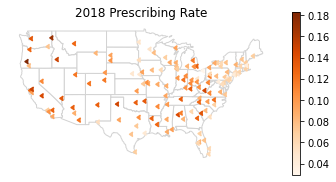

In [151]:
base = us_map_mainstates_gdf.plot(color='white', edgecolor='lightgray')

opi_prescribing_rates_US.plot(kind='scatter',
                              x='longitude', 
                              y='latitude',
                              color=opi_prescribing_rates_US['2018 Prescribing Rate'],
                              cmap='Oranges',
                              figsize=(6,3),
                              marker=4,
                              ax=base
                             )
plt.axis('off')
plt.title('2018 Prescribing Rate')
plt.show()

2. The second option is to create a `GeoDataFrame` from the `Pandas` data frame

* STEPS
  1. translate the `point` string column to a geometry colum
  2. create a new `GeoDataFrame` from `opi_prescribing_rates_US`

In [152]:
geom=opi_prescribing_rates_US['point'].apply(wkt.loads)

opi_prates_US_gdf = gpd.GeoDataFrame(opi_prescribing_rates_US,
                 geometry=geom)
opi_prates_US_gdf=opi_prates_US_gdf.set_crs('EPSG:4326')

* Plotting points using `GeoPandas`

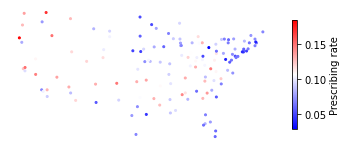

In [160]:
opi_prates_US_gdf.plot(column='2018 Prescribing Rate',
                        legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Prescribing rate'
                                    },
                        markersize=4,
                        cmap='bwr'
                      )

plt.axis('off')
plt.show()

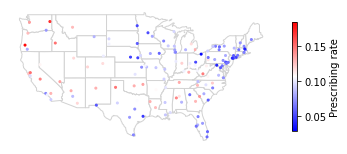

In [161]:
base = us_map_mainstates_gdf.plot(color='white', edgecolor='lightgray')
opi_prates_US_gdf.plot(column='2018 Prescribing Rate',
                        legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Prescribing rate'
                                    },
                        markersize=4,
                        cmap='bwr',
                       ax=base
                      )

plt.axis('off')
plt.show()

* Gives us the same plot as above 

* Probably using the `Blue-White-Red` colormap is misleading here because of the strong association with Dem-Rep (see options for cmaps - https://matplotlib.org/stable/gallery/color/colormap_reference.html)

#### Showing state averages

* We can also use `groupby` on `state_full` to get the mean presecribing rates

In [185]:
cols_to_use = ['2012 Prescribing Rate',
               '2018 Prescribing Rate',
               '2012 to 2018 Rate Difference'
              ]

opi_prates_bystate=opi_prescribing_rates_US.groupby('state_full')[cols_to_use].mean()

* Then we can merge them into the US state map

In [189]:
us_prates_gdf=us_map_mainstates_gdf.merge(opi_prates_bystate,
                            left_on='name',
                            right_index=True
                           )

us_prates_gdf.head()

,id,name,density,geometry,2012 Prescribing Rate,2018 Prescribing Rate,2012 to 2018 Rate Difference
0,01,Alabama,94.65,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",0.185838,0.114137,-0.071701
2,04,Arizona,57.05,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",0.206743,0.112044,-0.094699
3,05,Arkansas,56.43,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",0.235962,0.108011,-0.127951
4,06,California,241.70,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",0.206487,0.113604,-0.092883
5,08,Colorado,49.33,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",0.183462,0.117924,-0.065538


* Finally we can plot the map using the column of interest to color each state shape

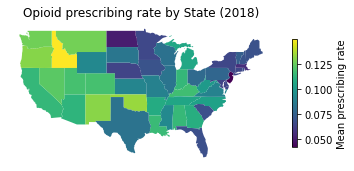

In [194]:
us_prates_gdf.plot(column='2018 Prescribing Rate',
                    legend=True,
                        legend_kwds={'shrink': 0.5,
                                     'label': 'Mean prescribing rate'
                                    },
                  )

plt.title('Opioid prescribing rate by State (2018)')
plt.axis('off')
plt.show()

* This level of aggregation misses some interesting patterns, for example within texas

* But it has some advantages of being a clearer presentation of the pattern